In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [13]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

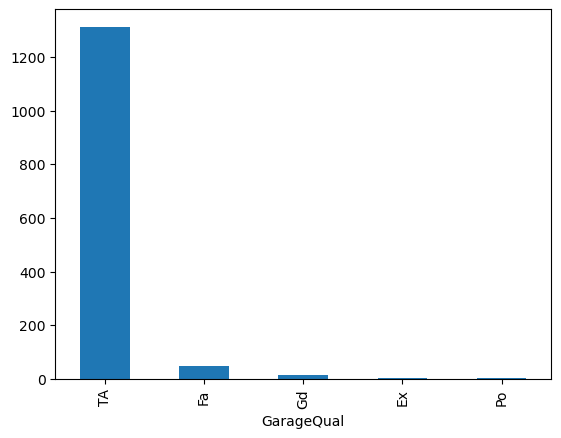

In [14]:
df['GarageQual'].value_counts().plot(kind='bar')

In [15]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

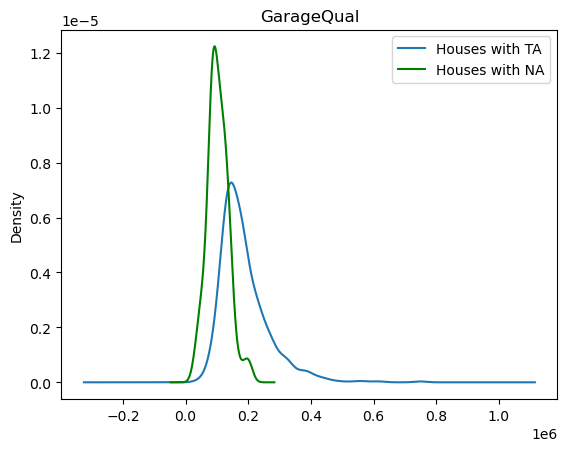

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde')

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',color='green')

lines,labels = ax.get_legend_handles_labels()
labels=['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')


In [17]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [18]:
df['GarageQual'].fillna('TA',inplace=True)

/tmp/ipykernel_64910/584385255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

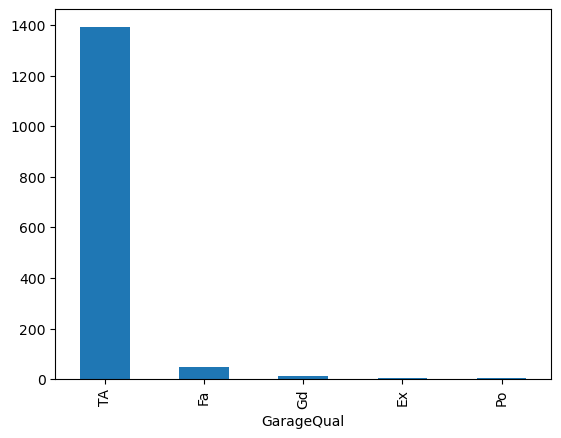

In [19]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

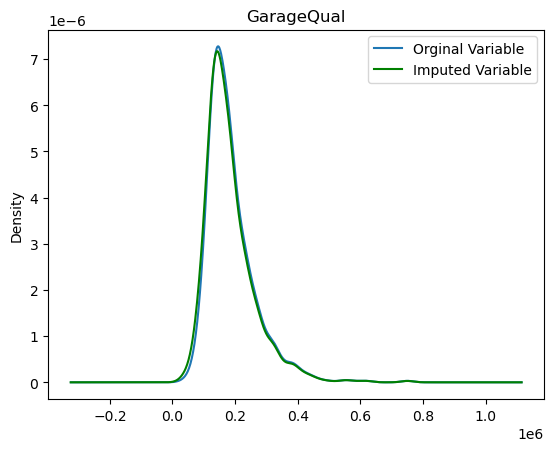

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

temp.plot(kind='kde')

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='green') # this consis of missing valuse + orginal TA values the missing values are very low so that the graps of two are overlayed 

lines,labels = ax.get_legend_handles_labels()
labels = ['Orginal Variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [21]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

<Axes: xlabel='FireplaceQu'>

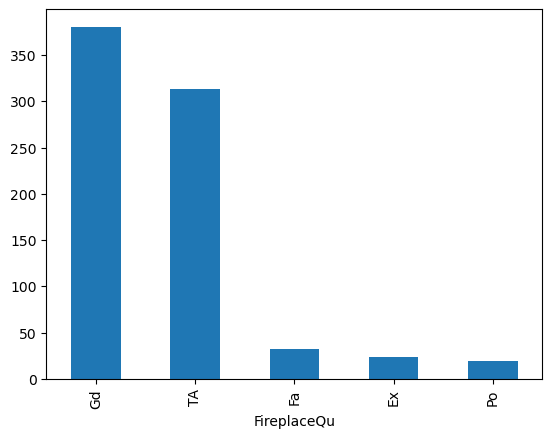

In [22]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [24]:
df['FireplaceQu'].isnull().mean()

0.4726027397260274

In [23]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

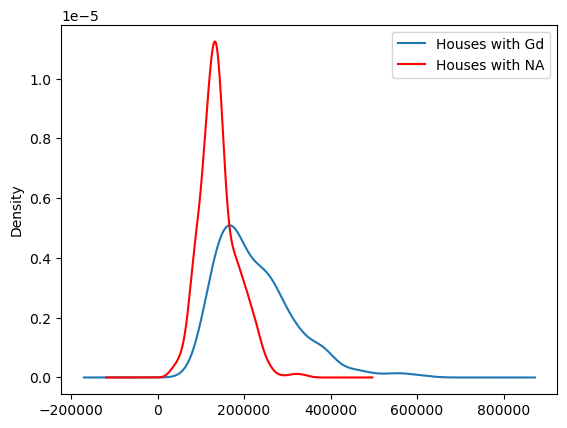

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde')

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd','Houses with NA']
plt.legend(lines,labels,loc='best')


In [27]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [28]:
df['FireplaceQu'].fillna('Gd',inplace=True)

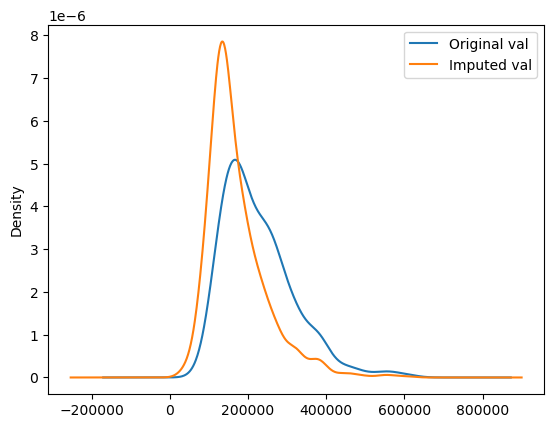

In [30]:
fig = plt.figure()
ax = fig.add_subplot()

temp.plot(kind='kde',ax=ax)

df[df['FireplaceQu']=='Gd'].plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels=['Original val','Imputed val']
ax.legend(lines,labels,loc='best')
# the kde plots are not overlay like above becoz the more missing values like 49% which the changes the pdf distribution

### by sklearn

In [31]:
x = df.drop(['SalePrice'],axis=1)
y = df[['SalePrice']]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

x_train.shape,x_test.shape

((1095, 2), (365, 2))

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [35]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [36]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)